# Online Retail Customer Segmentation
#### Project Type: Unsupervised Machine Learning

# Dataset Description

#### Variable Information
**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.	

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides. 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Load the dataset
df = pd.read_excel('Online Retail.xlsx')

In [3]:
#print top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#print bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#print the shape of dataset
df.shape

(541909, 8)

In [6]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**It's evident from the data that we have a significant number of missing values in the customerID & Description columns, while all other columns appear intact. Dropping these null values seems reasonable, especially since retaining them serves no purpose during customer segmentation.**

In [7]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Data Preparation
handling missing values, cleaning the data, and transforming it into a format suitable for analysis.

In [8]:
# check if there is a null values in the dataset
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**In our dataset, there are 135,080 null values in the CustomerID column and 1,454 null values in the Description column. Given that we are conducting customer segmentation, it would be prudent to drop the null values in the CustomerID and Description columns, as retaining them serves no purpose in this context.**

In [9]:
#dropping null values in the dataset
df.dropna(inplace=True)

In [10]:
#checking for missing values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#checking the shape of dataset
df.shape

(406829, 8)

In [12]:
#checking the infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**Following the removal of null values from our dataset, we now have 406,829 rows and 8 columns in total.**

In [13]:
#Counts and prints the number of duplicate rows in the dataset.
duplicates_retail = df.duplicated()
print("Duplicate values in df are:", duplicates_retail.sum())

Duplicate values in df are: 5225


In [14]:
#Removes duplicate rows from the dataset and resets the index.
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [15]:
# checking if there is any duplicate rows in the dataset
duplicates_retail = df.duplicated()
print("Duplicate values in df are:", duplicates_retail.sum())

Duplicate values in df are: 0


**The dataset contains a total of 5225 duplicate rows. Duplicate rows could potentially skew analysis results and should be handled appropriately by removing them to ensure data integrity.**

In [16]:
df.shape

(401604, 8)

In [17]:
#Generates descriptive statistics summarizing
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


**Through the results of the describe function, it's evident that the minimum value in the Quantity column includes negative values(-80995), which is illogical as it represents the quantity of each product. The values should inherently be positive. Additionally, we observe that the UnitPrice column has a minimum value of zero (0.0). Considering this column represents the price of the product, it's perplexing for it to be zero. While it's conceivable for a product to be free, the data does not clarify such instances. We will proceed with filtering operations to eliminate data that could potentially impact the analysis results.**

In [18]:
#changing datatype of InvoiceNo columns to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [19]:
# Filter out rows where 'InvoiceNo' starts with 'C'
df = df[~df['InvoiceNo'].str.startswith('C')]

**The removal of InvoiceNo entries beginning with 'c' was conducted.**

**The prefix 'c' typically denotes cancellations within the dataset.**

In [20]:
#checking the shape of dataset
df.shape

(392732, 8)

In [21]:
# Filter out rows with negative Quantity
df = df[df['Quantity'] >= 0]

**The dataset underwent filtering based on the condition where the Quantity column is greater than or equal to 0. This action is aimed at excluding any negative quantity entries from the dataset.**

In [22]:
#checking the shape of dataset
df.shape

(392732, 8)

In [23]:
#Counts the occurrences of zero values in the 'UnitPrice' column.
len(df[df['UnitPrice'] == 0])

40

In [24]:
#Filters dataset to exclude rows where the 'UnitPrice' column equals zero.
df = df[df['UnitPrice'] != 0]

**The dataset underwent filtering process where rows with a 'UnitPrice' of zero were excluded. A total of 40 rows within the dataset  contain zero values in the 'UnitPrice' column.**

In [25]:
#checking the shape of dataset
df.shape

(392692, 8)

In [26]:
#Generates descriptive statistics summarizing After filter the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


**We can observe a change in the minimum value for both the Quantity (1.0) and UnitPrice (0.001) columns.**

# Exploratory data analysis


#### Description Name



In [27]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.columns = ['Description_Name', 'Count'] 
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


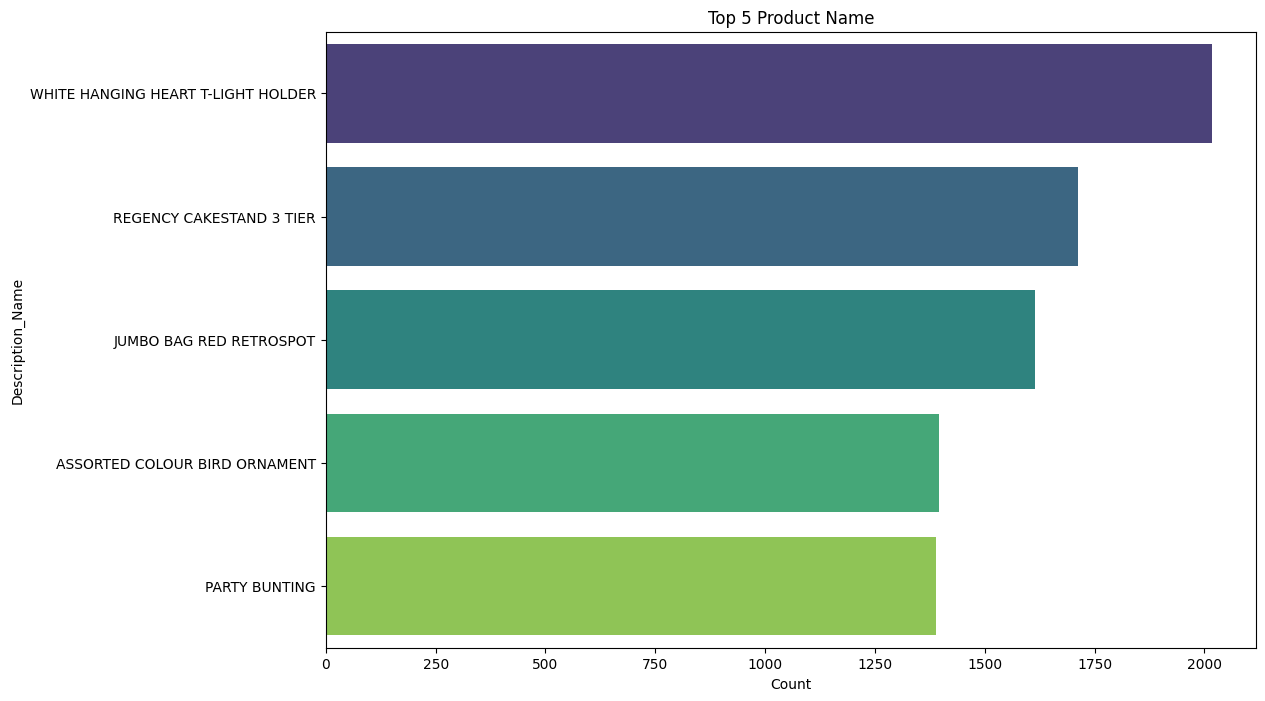

In [28]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count', y='Description_Name',data=Description_df[:5], palette='viridis');

**Top product based on maximum selling are:**

1. WHITE HANGING HEART T-LIGHT HOLDER

2. REGENCY CAKESTAND 3 TIER

3. JUMBO BAG RED RETROSPOT

4. ASSORTED COLOUR BIRD ORNAMENT

5. PARTY BUNTING

In [29]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


**Bottom 5 Product based on the selling are:**

1. GREEN WITH METAL BAG CHARM

2. WHITE WITH METAL BAG CHARM

3. BLUE/NAT SHELL NECKLACE W PENDANT

4. PINK EASTER HENS+FLOWER

5. PAPER CRAFT , LITTLE BIRDIE	

#### StockCode Name


In [30]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.columns = ['StockCode_Name', 'Count'] 

#top 5 stockcode name
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


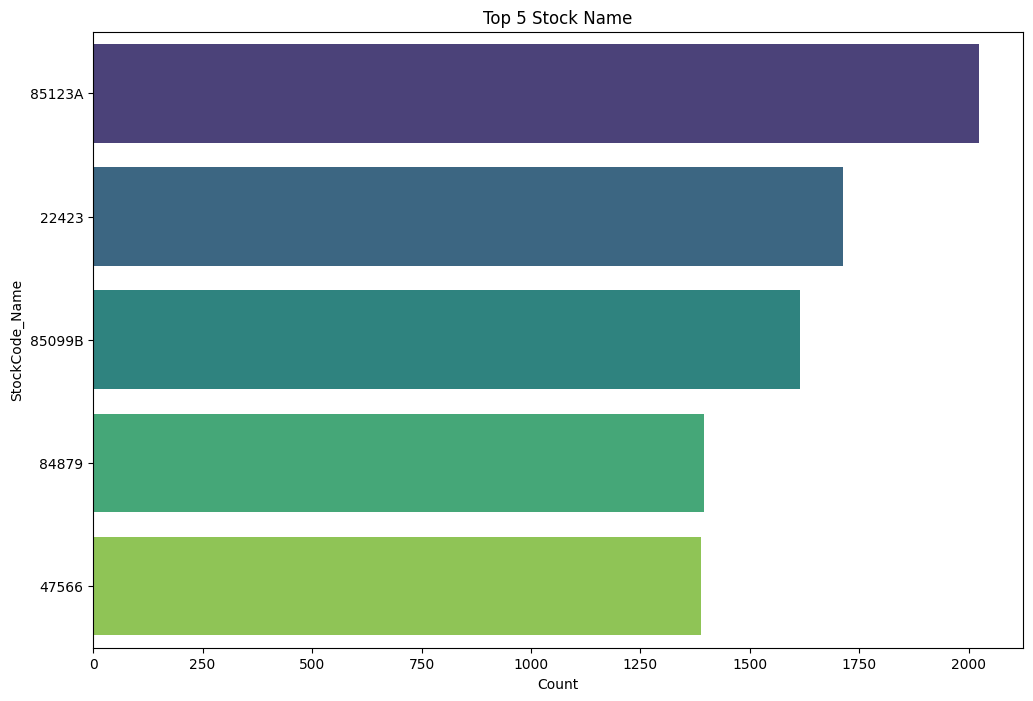

In [31]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='viridis');


**Top 5 Stock name based on selling are :**

1. 85123A

2. 22423

3. 85099B

4. 84879

5. 47566

In [32]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3660,90059A,1
3661,20678,1
3662,90059D,1
3663,90168,1
3664,23843,1


#### Country Name



In [33]:

country_df=df['Country'].value_counts().reset_index()
country_df.columns = ['Country_Name', 'Count']

#top 5 country name
country_df.head()

,Country_Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


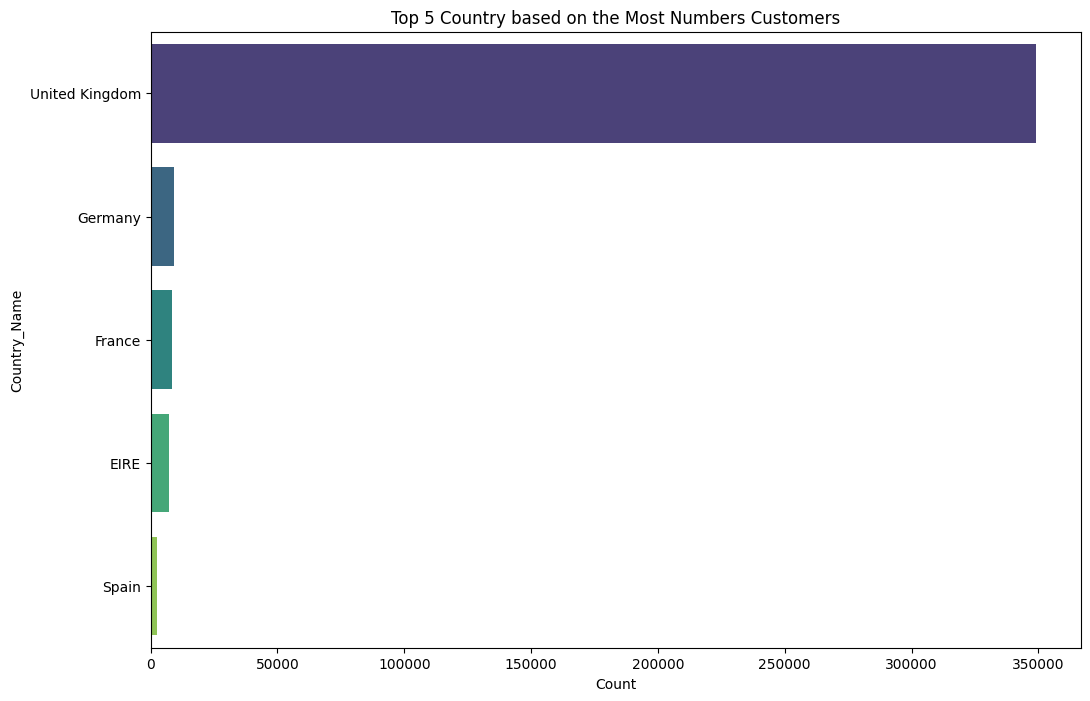

In [34]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='viridis');

**The graph reveals that the majority of customers originate from the United Kingdom, which aligns with the company's UK-based operations. Following the UK, significant customer bases are observed in Germany, France, EIRE, and Spain.**







In [35]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


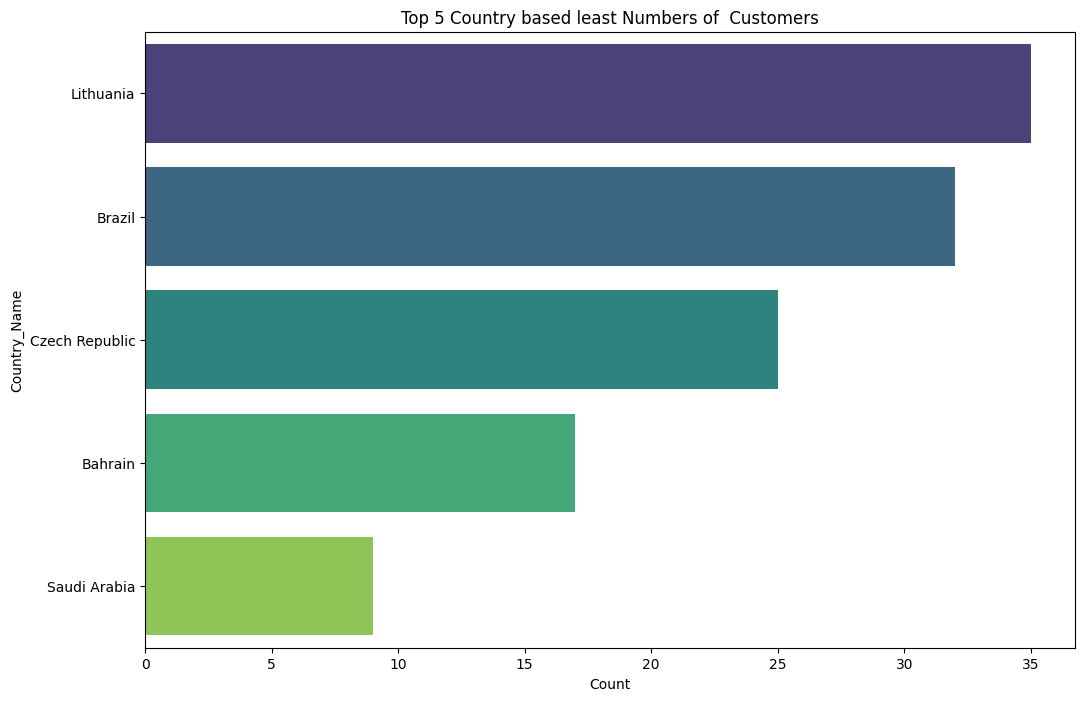

In [36]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-5:], palette='viridis');


#### The graph illustrates that Lithuania, Brazil, Czech Republic, Bahrain, and Saudi Arabia have the fewest number of customers.







#### Distribution of Quantity



C:\Users\L\AppData\Local\Temp\ipykernel_35028\527833592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'],color="r");
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


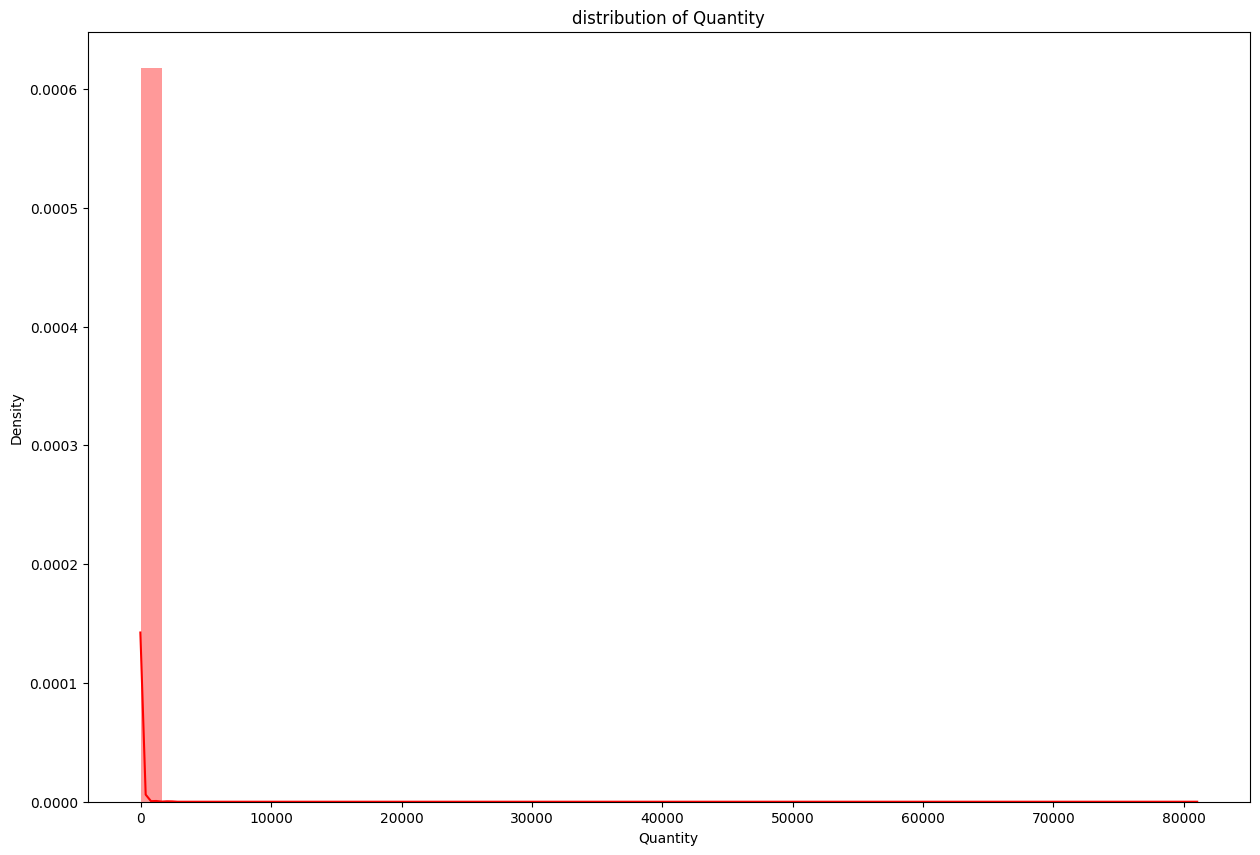

In [37]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

**The distribution appears to be positively skewed, indicating that the majority of values are concentrated towards the lower end of the scale. This means that there are fewer occurrences of higher values, with most data points clustered towards the left side of the distribution.**







C:\Users\L\AppData\Local\Temp\ipykernel_35028\1119806387.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Quantity']),color="r");
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


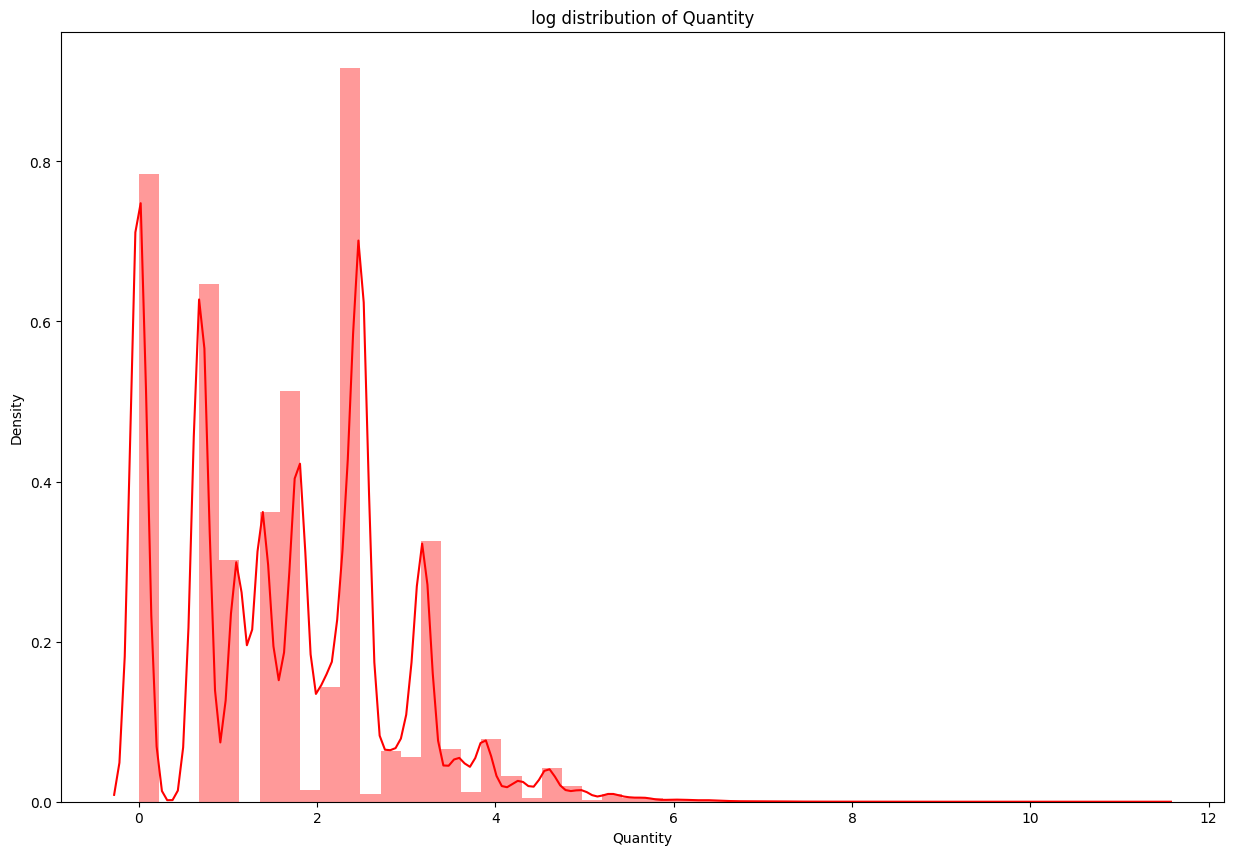

In [38]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

#### Distribution of Unit Price



C:\Users\L\AppData\Local\Temp\ipykernel_35028\4007700115.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'],color="r")
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

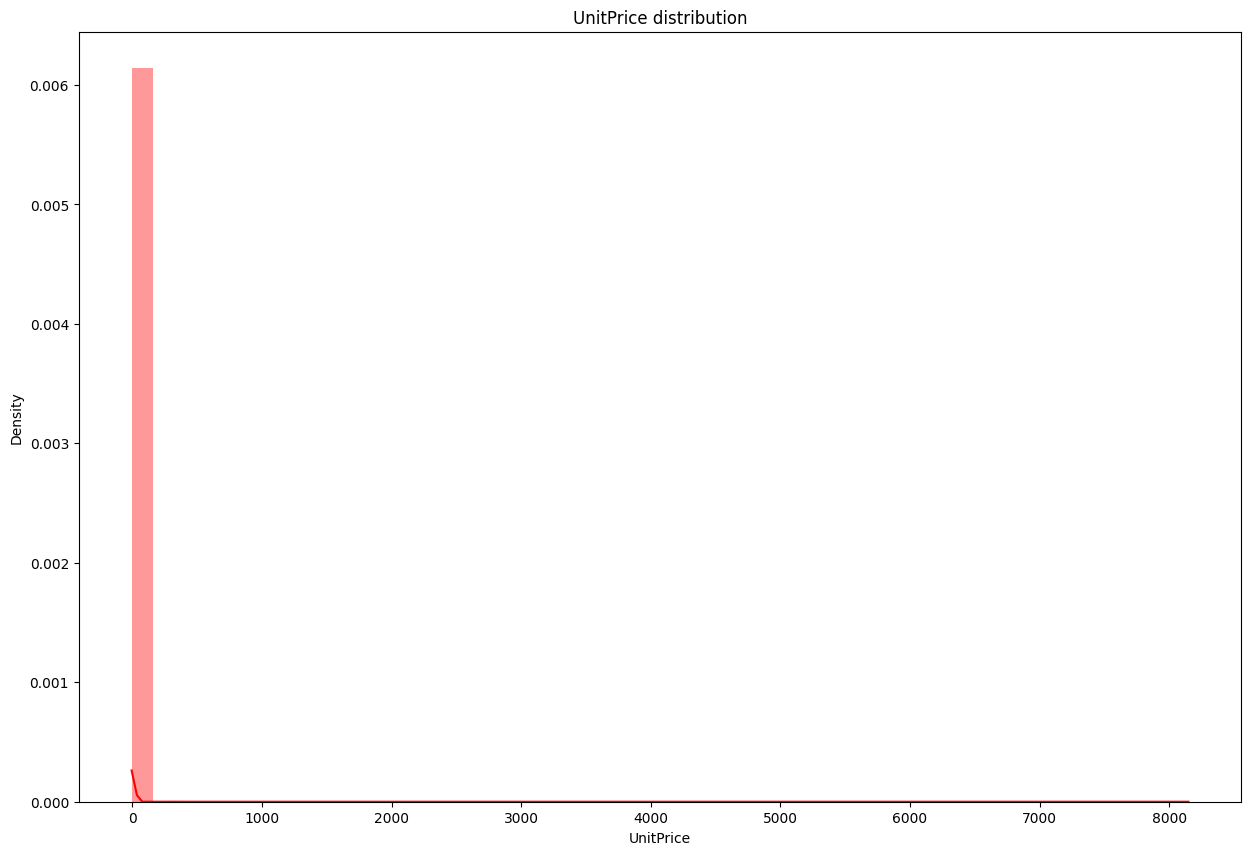

In [39]:

#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

**From the distribution of unit price, we can say that most items have a lower price range.**

# Feature Engineering


#### purchase history

In [40]:
# Convert the InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [41]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [42]:
#Creating a new feature TotalPrice from product of Quantity and Unitprice
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


#### Distribution of Total Price



C:\Users\L\AppData\Local\Temp\ipykernel_35028\1585252251.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalPrice'],color="r");
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


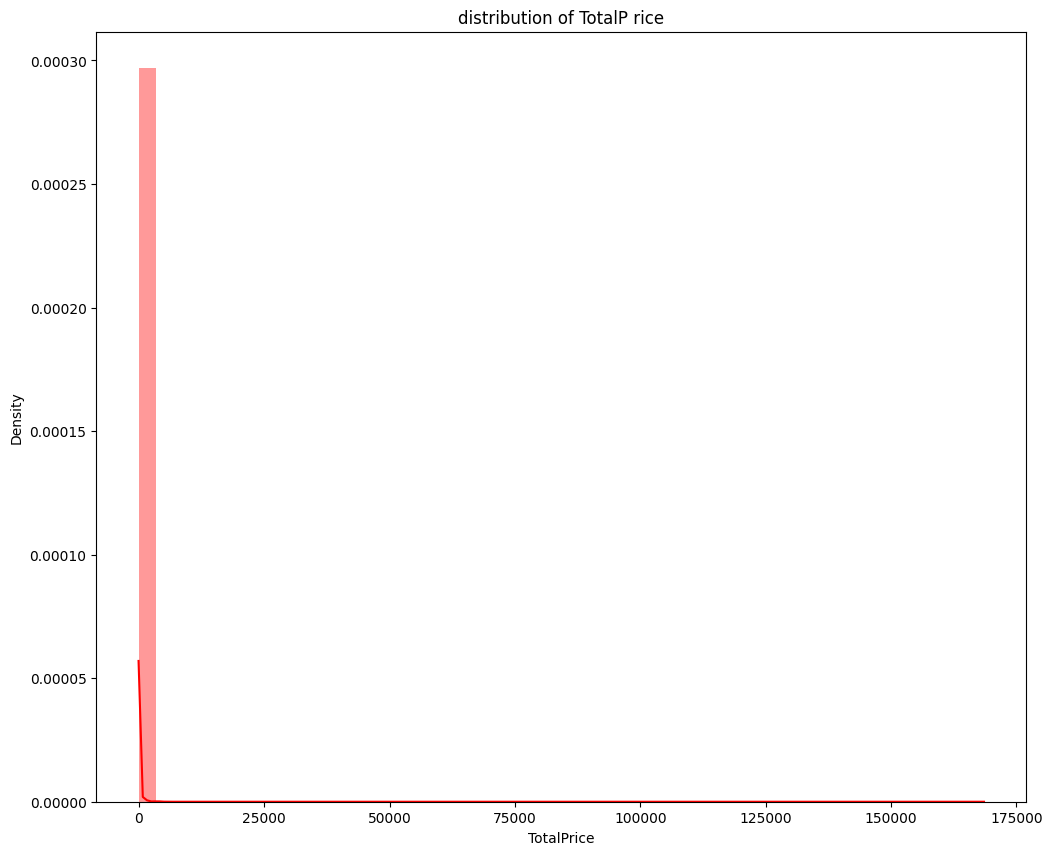

In [44]:
#checking distribution for TotalPrice
plt.figure(figsize=(12,10))
plt.title('distribution of TotalP rice')
sns.distplot(df['TotalPrice'],color="r");

#### Months


In [45]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.columns = ['Month_Name', 'Count']
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


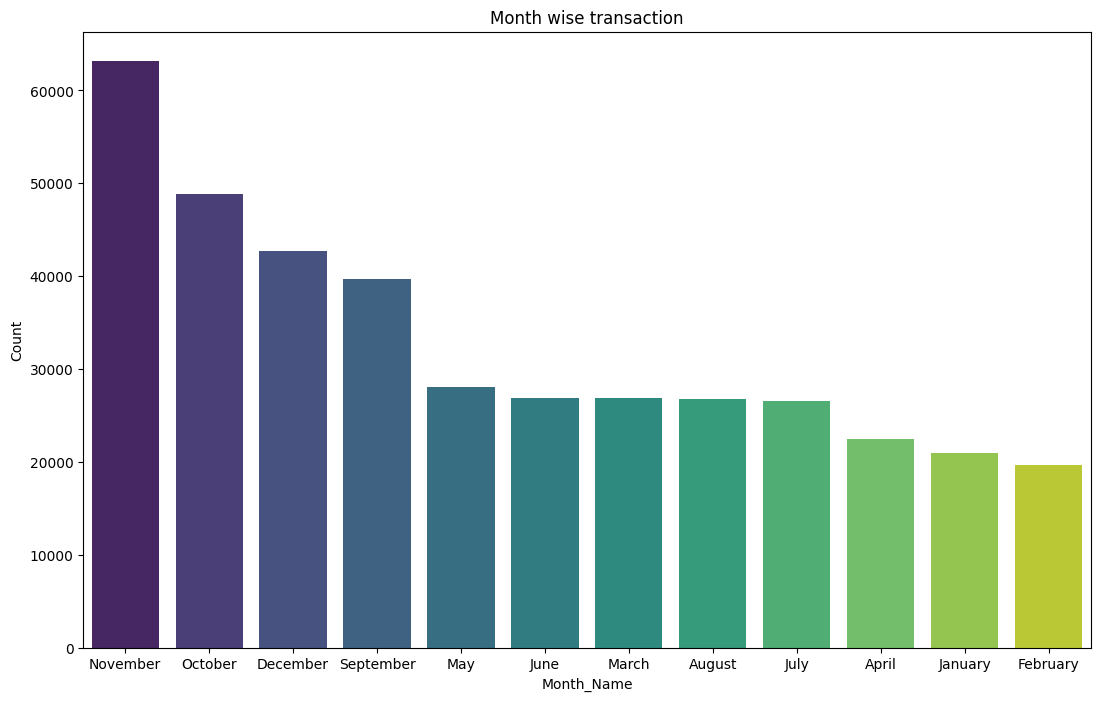

In [46]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='viridis');

**Through the graph, we notice a surge in sales during the months of November, October, and December. This could be attributed to preparations for specific celebrations, such as the New Year's Eve festivities in late December. November emerges as the month with the highest average purchase rate among these months. Conversely, the months with the lowest purchase rates are April, January, and February.**







#### Days

In [47]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.columns = ['Day_Name', 'Count']
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


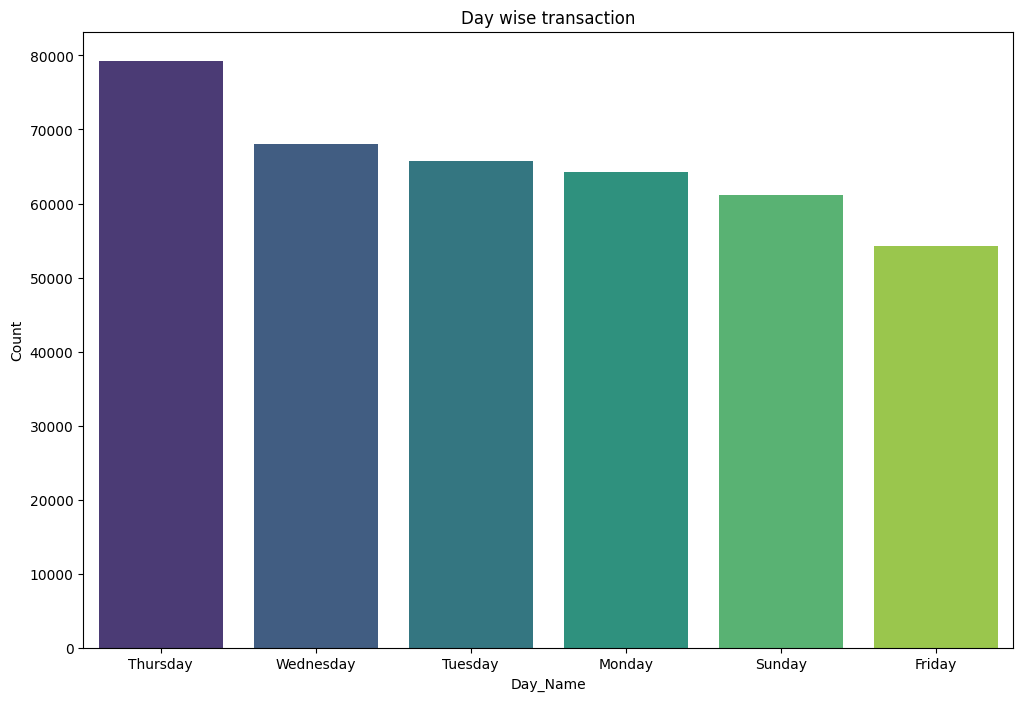

In [48]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='viridis');


**From the graph, we observe that the majority of customers make purchases on Thursdays, which stands out as the highest-selling day, followed by Wednesdays and Tuesdays.**

**Interestingly, there are no sales transactions recorded for Saturdays. The reason for this absence is unclear; it could be due to data limitations or other factors.**







In [49]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.columns = ['Hours', 'Count']
hour_df

,Hours,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


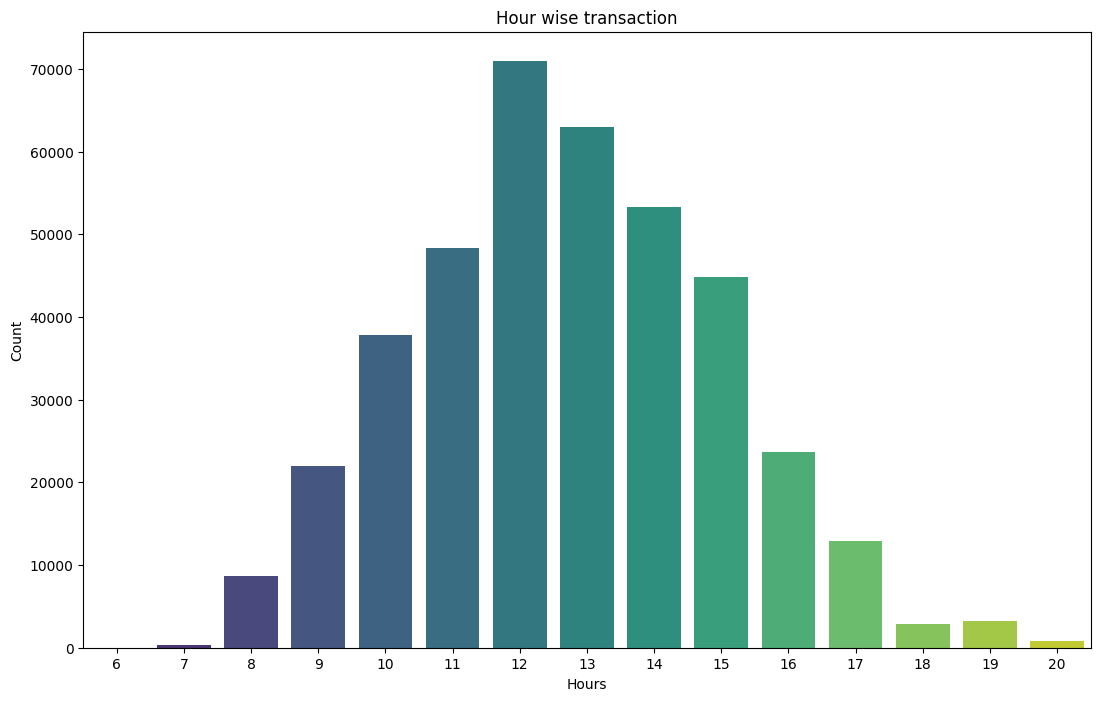

In [50]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df, palette='viridis');

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [51]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [52]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

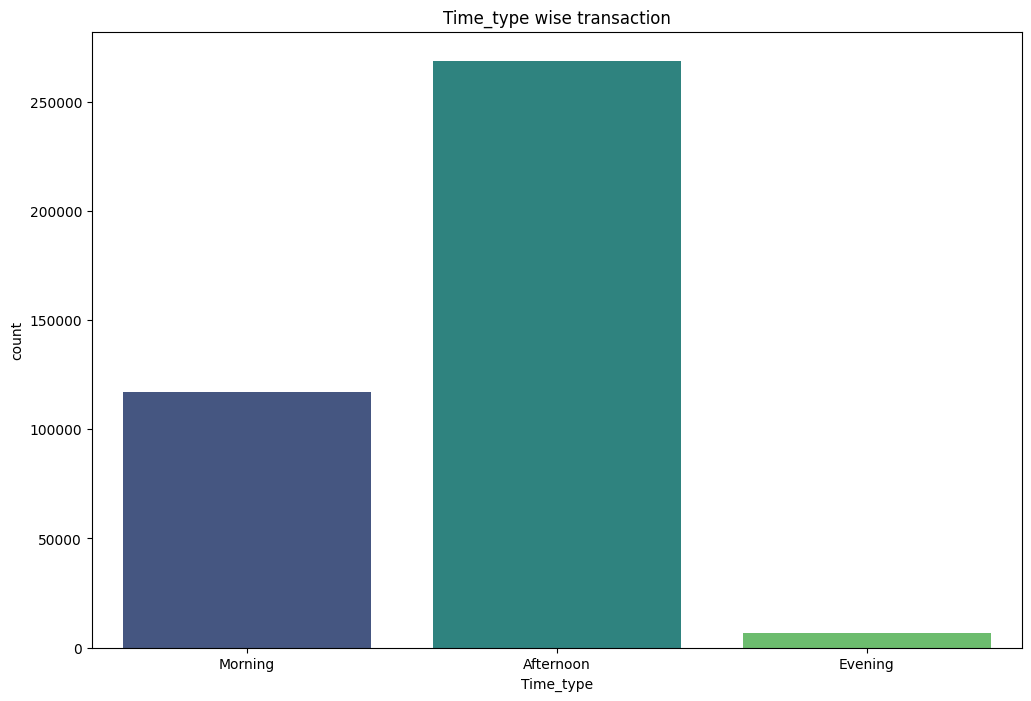

In [53]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='viridis');

**From the graph, it's evident that most customers making purchases in the afternoon, with a moderate number of customers making purchases in the morning, and very few making purchases in the evening. Introducing offers or discounts exclusively available in the evening could potentially attract more customers to visit the store during that time and increase the likelihood of purchases during these hours. This strategy aims to capitalize on the trend of customer behavior and boost sales during the evening period.**


#### RFM analysis
I use RFM analysis in this part. The “RFM” in RFM analysis stands for recency, frequency and monetary value. RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future.

RFM stands for the three dimensions:

* Recency – Refers to how recently the customer made a purchase.

* Frequency – Indicates how often the customer makes purchases.

* Monetary – Reflects the amount spent by the customer on purchases.

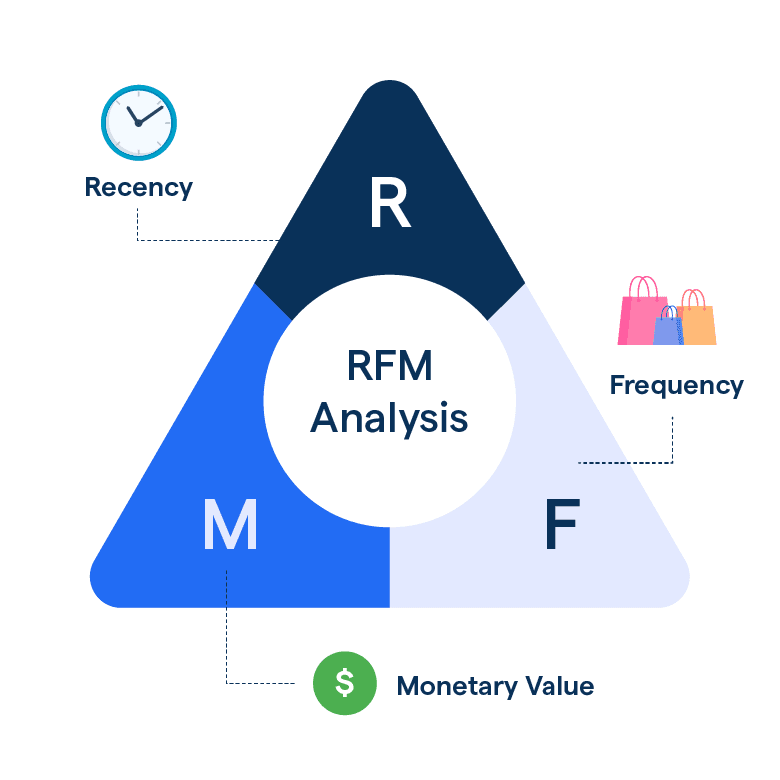

**Recency**:
Calculate the number of days between the most recent transaction and the current date to determine the Recency of each customer.


**Frequency:** Calculate the number of transactions each customer has made to capture how frequently they make purchases.


**Monetary Value:** Calculate the total amount spent by each customer by multiplying the quantity of items purchased by the unit price to determine their Monetary Value score.

In [54]:
# Calculate recency of purchase for each customer -> Recency = Latest Date  - Last Inovice Data

#Define the last date, we already know all the transactions occurring between 01/12/2010 and 09/12/2011, So:
Latest_Date  = dt.datetime(2011,12,9) 


#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.columns=['Recency', 'Frequency', 'Monetary']

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,17,73,1757.55
4,12350.0,309,17,334.40


In [55]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       91.059474
std       100.012264
min        -1.000000
25%        16.000000
50%        49.000000
75%       140.750000
max       372.000000
Name: Recency, dtype: float64

C:\Users\L\AppData\Local\Temp\ipykernel_35028\3268026636.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


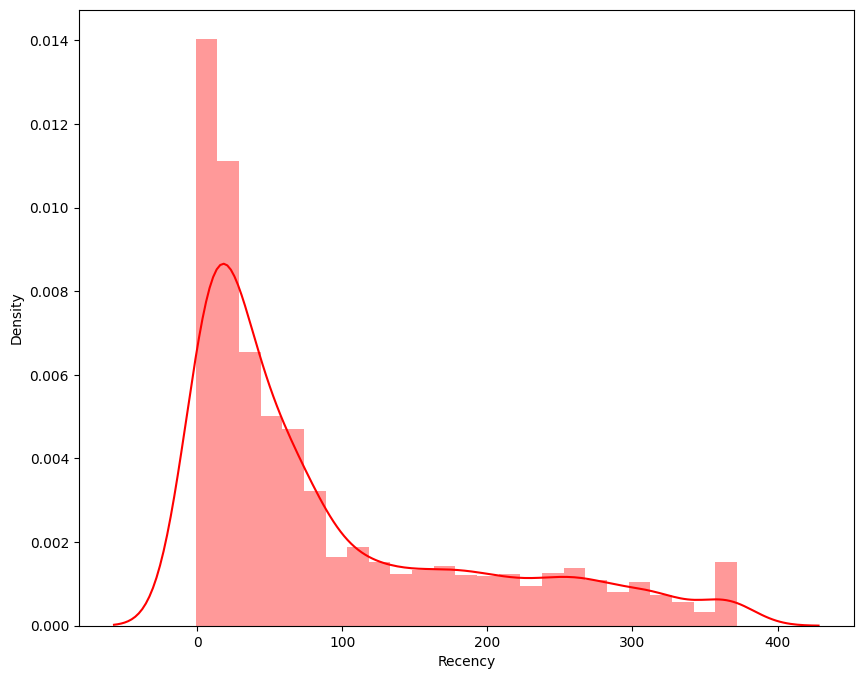

In [56]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [57]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

C:\Users\L\AppData\Local\Temp\ipykernel_35028\376083515.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


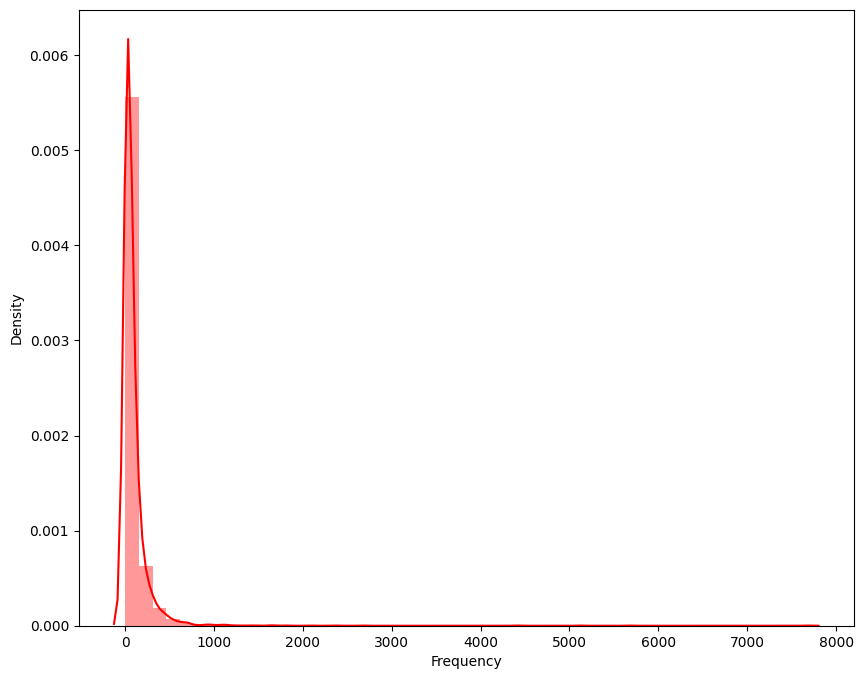

In [58]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [59]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

C:\Users\L\AppData\Local\Temp\ipykernel_35028\271500754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r')
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Monetary', ylabel='Density'>

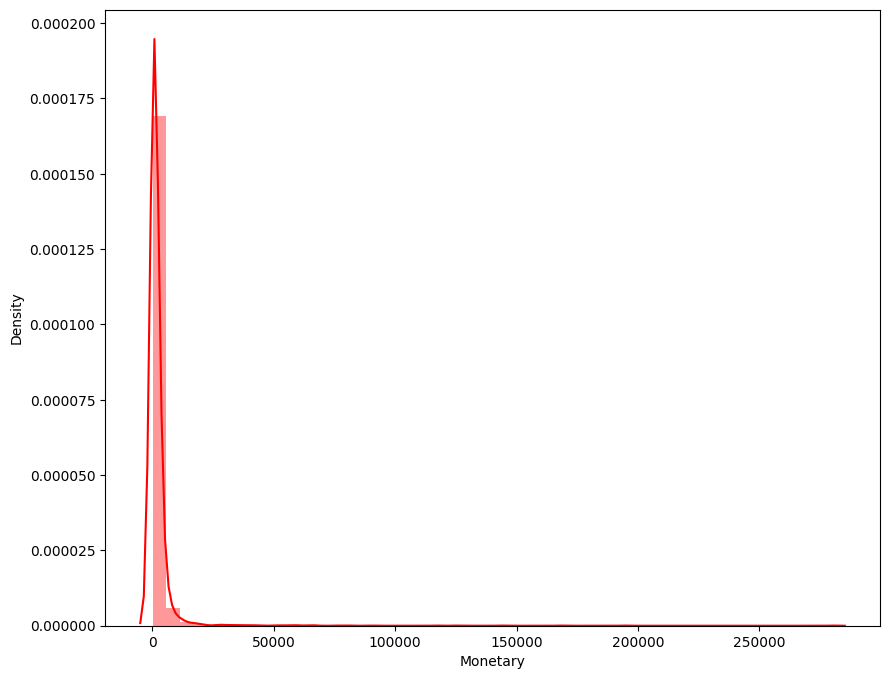

In [60]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

**From all the above graphs of Recency, Frequency and Monetary we can say that all are positively skewed distribution.**
*

In [61]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int32  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 118.6 KB


In [62]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm_df_copy = rfm_df.copy()
rfm_df_copy['R'] = pd.qcut(rfm_df_copy['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df_copy['F'] = pd.qcut(rfm_df_copy['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df_copy['M'] = pd.qcut(rfm_df_copy['Monetary'], q=4, labels=[1,2,3,4]).astype(int)
     

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm_df_copy['RFM'] = 100*rfm_df_copy['R'] + 10*rfm_df_copy['F'] + rfm_df_copy['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm_df_copy['RFM_Score'] = rfm_df_copy['R'] + rfm_df_copy['F'] + rfm_df_copy['M']

**Interpretation:**

1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [63]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm_df_copy.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm_df_copy['Recency_Log']   = rfm_df_copy['Recency'].apply(np.log)
rfm_df_copy['Frequency_Log'] = rfm_df_copy['Frequency'].apply(np.log)
rfm_df_copy['Monetary_Log']  = rfm_df_copy['Monetary'].apply(np.log)
rfm_df_copy.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,324,1,77183.60,1,1,4,114,6,5.780744,0.000000,11.253942
12347.0,1,182,4310.00,4,4,4,444,12,0.000000,5.204007,8.368693
12348.0,74,31,1797.24,2,2,4,224,8,4.304065,3.433987,7.494007
12349.0,17,73,1757.55,3,3,4,334,10,2.833213,4.290459,7.471676
12350.0,309,17,334.40,1,1,2,112,4,5.733341,2.833213,5.812338


In [64]:
# Checking Descriptive Stats
rfm_df_copy.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4303.000000,4338.000000,4338.000000
mean,91.083218,90.523744,2048.688081,2.505763,2.488013,2.500000,277.956432,7.493776,3.707409,3.671522,6.585704
std,99.990755,225.506968,8985.230220,1.122059,1.122626,1.118369,118.414416,2.814712,1.520808,1.320854,1.261763
min,-1.000000,1.000000,3.750000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,1.321756
25%,16.000000,17.000000,306.482500,1.250000,1.000000,1.250000,160.750000,5.000000,2.833213,2.833213,5.725161
50%,49.000000,41.000000,668.570000,3.000000,2.000000,2.500000,311.000000,7.000000,3.912023,3.713572,6.505141
75%,140.750000,98.000000,1660.597500,4.000000,3.000000,3.750000,411.000000,10.000000,4.955827,4.584967,7.414933
max,372.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,5.918894,8.945854,12.543280


### Outliers

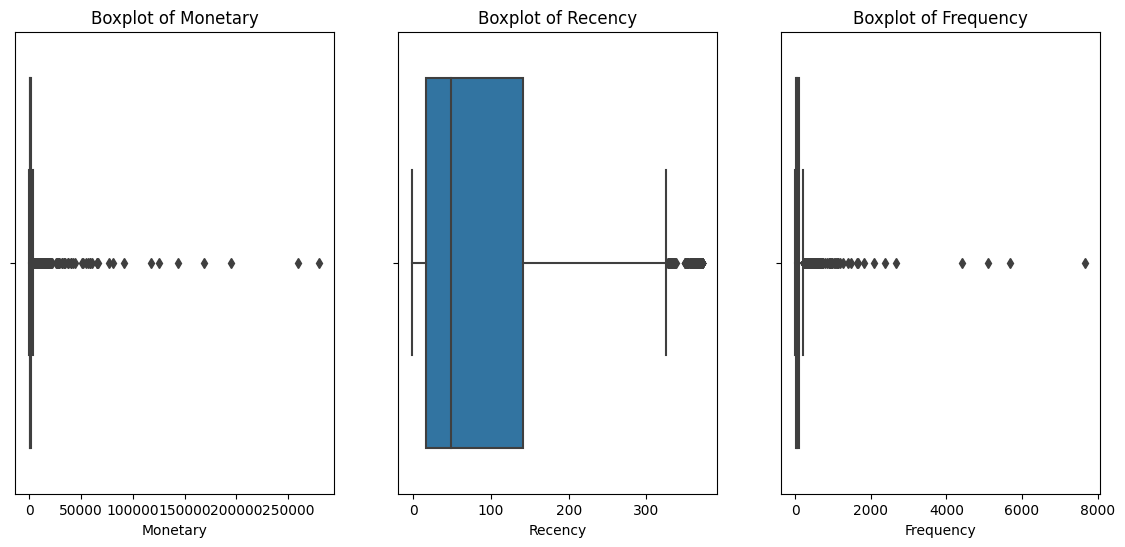

In [65]:
plt.figure(figsize=(14, 6))

# Create boxplot for 'Recency'
plt.subplot(1,3,2)
sns.boxplot(x=rfm_df['Recency'])
plt.title('Boxplot of Recency')

# Create boxplot for 'Frequency'
plt.subplot(1,3,3)
sns.boxplot(x=rfm_df['Frequency'])
plt.title('Boxplot of Frequency')

# Create boxplot for 'Monetary'
plt.subplot(1,3,1)
sns.boxplot(x=rfm_df['Monetary'])
plt.title('Boxplot of Monetary')

plt.show()

In [66]:
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

In [67]:
rfm_df.shape

(4257, 3)

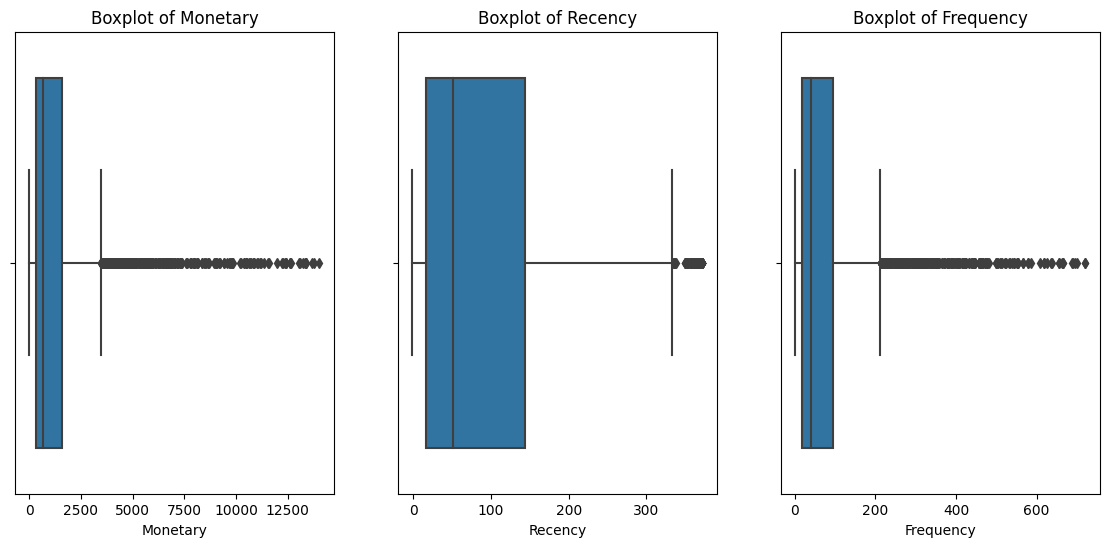

In [68]:
plt.figure(figsize=(14, 6))

# Create boxplot for 'Recency'
plt.subplot(1,3,2)
sns.boxplot(x=rfm_df['Recency'])
plt.title('Boxplot of Recency')

# Create boxplot for 'Frequency'
plt.subplot(1,3,3)
sns.boxplot(x=rfm_df['Frequency'])
plt.title('Boxplot of Frequency')

# Create boxplot for 'Monetary'
plt.subplot(1,3,1)
sns.boxplot(x=rfm_df['Monetary'])
plt.title('Boxplot of Monetary')

plt.show()

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


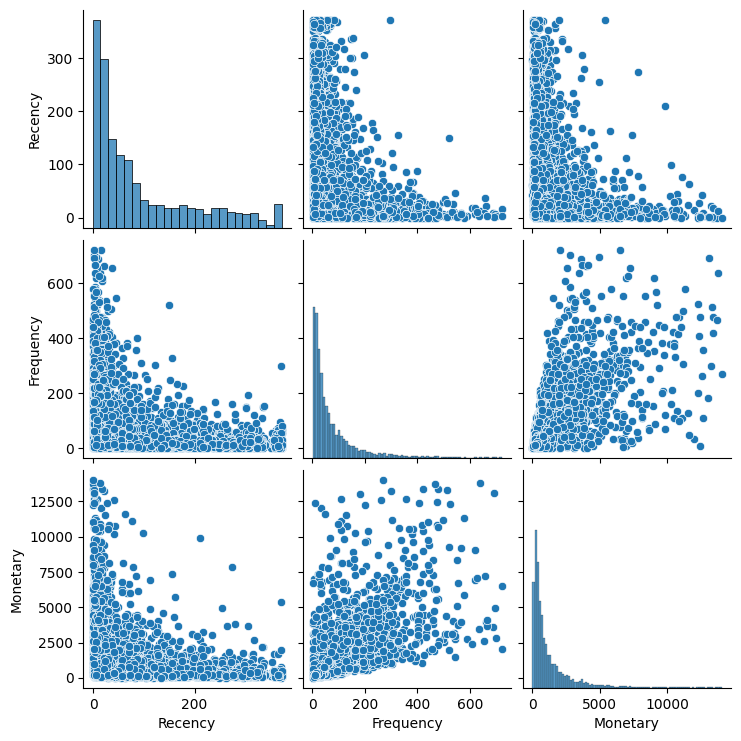

In [69]:
sns.pairplot(rfm_df)

# Dimensionality Reduction with PCA

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
x =  rfm_df[['Recency','Frequency', 'Monetary']]

### Scaling

In [73]:
# Standardize the features using StandardScaler
scl = StandardScaler()

# Fit and transform the data
rfm_df_scaled = scl.fit_transform(x)

# Fit and transform the data
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.913131,1.082637,1.660278
1,-0.184516,-0.456435,0.267299
2,-0.753434,-0.028348,0.245296
3,2.161023,-0.599130,-0.543644
4,-0.573776,0.093962,0.660231


### PCA
Principal Component Analysis is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible..

In [75]:
# Initialize PCA with 2 principal components
pca = PCA(n_components = 2)
# Fit PCA to the standardized data and transform it
x_pca = pca.fit_transform(rfm_df_scaled)

In [76]:
# Shape of the transformed data
x_pca.shape

(4257, 2)

In [77]:
# Principal components (eigenvectors)
pca.components_

array([[-0.4574556 ,  0.63318575,  0.6243478 ],
       [ 0.88821433,  0.2917733 ,  0.3548854 ]])

In [78]:
# Variance explained by each principal component
pca.explained_variance_ratio_

array([0.6383442 , 0.25294316])

In [79]:
# Create DataFrame of transformed data with column names
df_pca = pd.DataFrame(x_pca,columns=pca.get_feature_names_out())
df_pca

,pca0,pca1
0,2.139818,0.094037
1,-0.037712,-0.202205
2,0.479863,-0.590430
3,-1.707356,1.551710
4,0.734186,-0.247914
...,...,...
4252,-1.655091,1.208080
4253,-1.266098,0.319596
4254,-0.410280,-1.180100
4255,4.830063,1.260338


<BarContainer object of 2 artists>

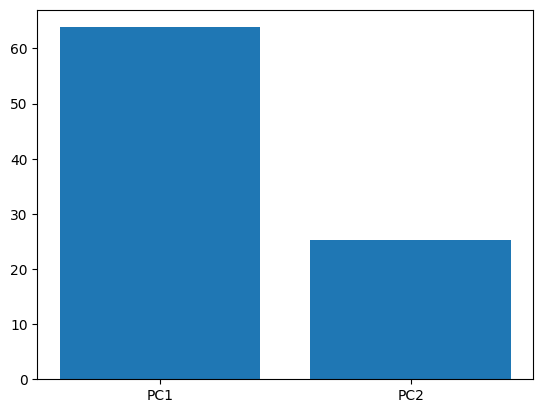

In [80]:
# Plot the explained variance ratio of each principal component
plt.bar (range (2) , (pca.explained_variance_ratio_)*100 , tick_label = ["PC" + str(x) for x in range(1 , 3)])

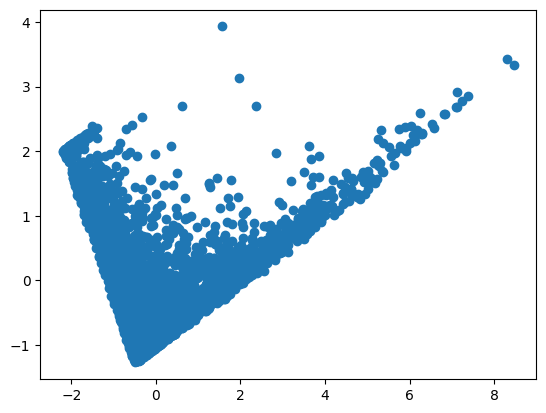

In [81]:
# Scatter plot of the transformed data in 2D space
plt.scatter (x_pca [: , 0] , x_pca [: , 1])

# Determining Optimal Number of Clusters
Finding the number of clusters using the elbow method

In [82]:
from sklearn.cluster import KMeans

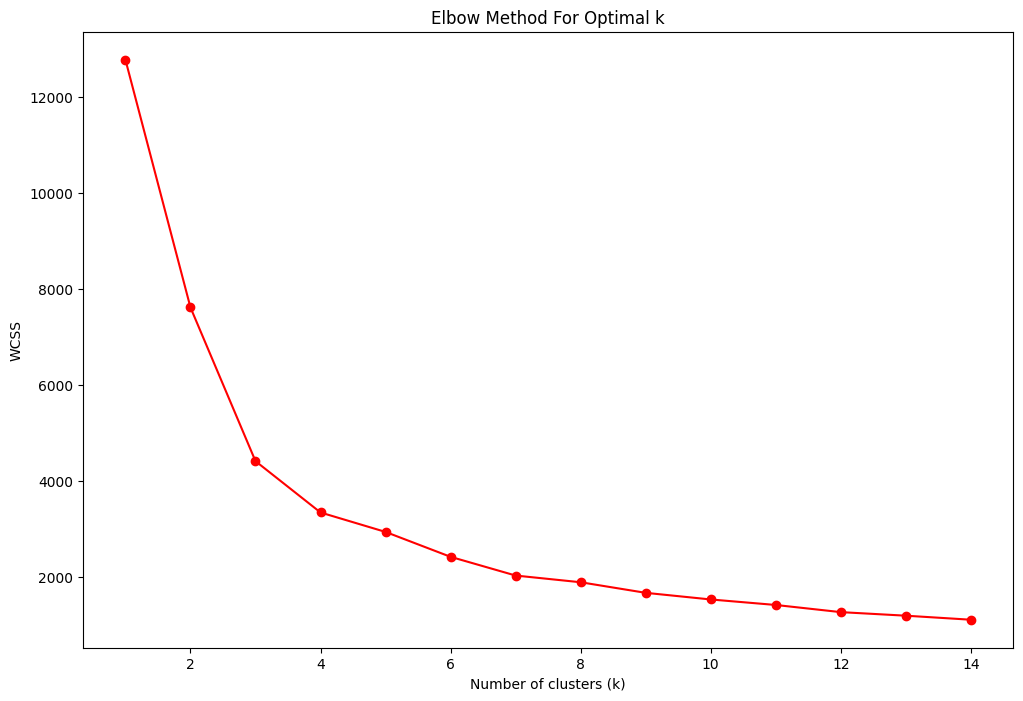

In [83]:
#applying elbow method
wcss = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(rfm_df_scaled)
    wcss.append(km.inertia_)
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
plt.plot(range(1, 15), wcss, color='r', marker='o', markerfacecolor='r')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

**We deduce that by using the elbow method k = 3 is better.**



# K-means Clustering

In [84]:
# Initialize KMeans clustering algorithm with 3 clusters
km = KMeans(n_clusters=3,  init='k-means++', max_iter=1000)

In [85]:
# Fit KMeans to the standardized data
km.fit(rfm_df_scaled)

KMeans(max_iter=1000, n_clusters=3)

In [ ]:

lbs = km.labels_
print(km.labels_)

In [ ]:
preds = km.fit_predict(rfm_df_scaled)

# Cluster Profiling

In [ ]:
# Cluster Profiling
cluster_profiles = pd.DataFrame()

# Calculate Average Spending
cluster_profiles['AverageSpending'] = rfm_df.groupby(preds)['Monetary'].mean()

# Calculate Purchase Frequency
cluster_profiles['PurchaseFrequency'] = rfm_df.groupby(preds)['Frequency'].mean()

# Calculate Recency Average 
cluster_profiles['AverageRecency'] = rfm_df.groupby(preds)['Recency'].mean()

print(cluster_profiles)

In [ ]:
rfm_df['Cluster_Id'] = lbs
rfm_df.head()

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)

**Upon observation from the graph, we notice that customers in Cluster 1 tend to exhibit a lower Recency  value compared to other clusters, indicating a propensity for more recent purchases. In contrast, customers in Cluster 2 demonstrate an average recency, while those in Cluster 0 show higher recency values. The Recency value in RFM represents how recently a customer made a purchase, with lower values indicating more recent transactions. Thus, a lower Recency value suggests that a customer made purchases more recently within the analyzed timeframe.**

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)

**Upon observation from the graph, we notice that customers in Cluster 1 tend to exhibit a higher Frequency value compared to other clusters, indicating a propensity for more frequent purchases. In contrast, customers in Cluster 2 demonstrate an average purchase frequency, while those in Cluster 0 show lower purchase frequencies. The Frequency value in RFM represents how often a customer makes purchases over a specific period. Thus, a higher Frequency value suggests that a customer makes purchases more frequently within the analyzed timeframe.**

In [ ]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)

**Upon observation from the graph, we notice that customers in Cluster 1 tend to exhibit a higher Monetary value compared to other clusters, indicating a propensity for increased spending. In contrast, customers in Cluster 2 demonstrate an average spending rate, while those in Cluster 0 show lower spending proportions. The Monetary value in RFM denotes the total amount of money spent by each customer over a specific period. Thus, a higher Monetary value suggests that a customer has made larger purchases or spent more money on transactions within the analyzed timeframe.**

# Visualization

In [ ]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=preds, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

# Evaluation using Silhouette score method

The value of the silhouette score range lies between -1 to 1.
A score closer to 1 indicates that the data point is very similar to other data points in the cluste. A score closer to -1 indicates that the data point is not similar to the data points in its cluster.
,

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(rfm_df_scaled, preds)
print("Silhouette Score:", silhouette_score)

# Personalization and Recommendations

Based on the analysis of each cluster and its characteristics, here are the recommendations and suggestions for the store:

**Cluster 0 (Low Recency, Low Frequency, Low Monetary):**

Offer special promotions or discounts to incentivize purchases and increase spending.
Implement targeted marketing campaigns to re-engage these customers and encourage repeat purchases.
Provide personalized product recommendations based on past purchases to enhance relevance and encourage conversion.
Use email marketing or loyalty programs to stay connected with these customers and foster brand loyalty.


**Cluster 1 (High Recency, High Frequency, High Monetary):**

Acknowledge and reward loyal customers with exclusive offers, VIP benefits, or loyalty rewards to maintain their loyalty and increase their lifetime value.
Implement cross-selling or upselling strategies to encourage these customers to explore additional products or services.
Collect feedback and insights from these valuable customers to understand their preferences and tailor offerings accordingly.
Utilize personalized communication channels such as targeted emails or SMS campaigns to enhance engagement and satisfaction.


**Cluster 2 (Average Recency, Average Frequency, Average Monetary):**

Focus on improving customer satisfaction and retention through personalized customer service and support.
Offer targeted promotions or incentives to encourage repeat purchases and increase customer loyalty.
Analyze purchasing patterns and preferences to identify opportunities for product bundling or package deals that appeal to this segment.
Leverage social media platforms or online communities to foster engagement and encourage customer interaction.

Overall, by implementing personalized marketing strategies and recommendations tailored to each cluster, the store can effectively boost customer engagement, satisfaction, and ultimately, drive revenue growth.






# Interpretation and Insights:



The segmentation analysis has provided valuable insights into the customer base of the e-commerce business, allowing for a deeper understanding of customer behavior and preferences. Here are some key interpretations and insights:

**Targeted Marketing:** The segmentation has identified distinct customer segments based on recency, frequency, and monetary value. This enables the e-commerce business to tailor marketing efforts and promotions to each segment's specific needs and characteristics. For example, targeted email campaigns can be deployed to re-engage dormant customers in Cluster 0, while personalized offers and recommendations can be provided to high-value customers in Cluster 1.

**Customer Retention Strategies:** By understanding the characteristics of each segment, the e-commerce business can develop effective customer retention strategies. For instance, strategies to incentivize repeat purchases and reward loyalty can be implemented for customers in Cluster 1, while efforts to re-engage and nurture relationships can be focused on customers in Cluster 0.

**Inventory Management:** Segmentation analysis can also inform inventory management decisions by highlighting product preferences and purchase patterns within each segment. This allows for better inventory forecasting and allocation, ensuring that popular products are adequately stocked while minimizing excess inventory for less popular items.

For example, based on the analysis of the top-selling products, we identified the following best-selling items:

WHITE HANGING HEART T-LIGHT HOLD -  R
REGENCY CAKESTAND 3 T  -  ER
JUMBO BAG RED RETRO  -  POT
ASSORTED COLOUR BIRD ORN  -  MENT
PARTY BUNTING

**Personalized Customer Experience:** Insights from segmentation can be used to deliver a more personalized customer experience across various touchpoints, including website customization, product recommendations, and customer support interactions. Tailoring the customer experience to meet the unique preferences and needs of each segment can lead to increased satisfaction and loyalty.


Overall, segmentation analysis provides valuable guidance for targeted marketing, customer retention strategies, and inventory management, ultimately helping the e-commerce business optimize its operations and drive growth. By leveraging insights from segmentation, the business can better meet the evolving needs of its diverse customer base and maintain a competitive edge in the market.